<p style='direction:rtl; text-align: right'>ابتدا باید کتابخانه های زیر را وارد کنیم:
    <ul style='direction:rtl; text-align: right'>
        <li>numpy: برای کار با ماتریس ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>sklearn.neighbors: برای تولید ماتریس همسایگی</li>
        <li>sparse: برای تولید ماتریس لاپلاسین</li>
        <li>linalg: برای پیدا کردن مقادیر و بردار های ویژه </li>
        <li>sklearn.datasets: برای تولید دیتا جهت کلاسترینگ </li>
    </ul>
</p>

</p>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg
from sklearn.datasets import make_blobs, make_circles

<h1 style='direction:rtl; text-align: right'>
پروژه۳: کلاسترینگ
</h1>

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۱: پیاده سازی توابع norm
</h2>
<p style='direction:rtl; text-align: right'>تابع های زیر را پیاده سازی کنید:
    <ul style='direction:rtl; text-align: right'>
        <li>l2_norm: این تابع با گرفتن ۲ بردار فاصله اقلیدسی آن ها را محاسبه میکند.</li>
        <li>l2norm_vector: این تابع با گرفتن یک نقطه به عنوان ورودی اول و مجموعه ای از نقاط به عنوان ورودی دوم، فاصله نقطه اول را از تمامی نقاط در ورودی دوم را حساب میکند.</li>
        </ul>
</p>

In [35]:
def l2_norm(point, center):
    #####code here
    point = np.array(point);
    center = np.array(center);
    return np.sqrt(np.sum((point - center) ** 2));
    ########

def l2norm_vector(point, centers):
    l2 = [];
    for center in centers:
        #####code here
        l2.append(l2_norm(point, center));
        ########
    return np.array(l2)

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۲: پیاده سازی kmeans 
</h2>
<p style='direction:rtl; text-align: right'>در این قسمت باید تابع kmeans را پیاده سازی کنید:
    <ul style='direction:rtl; text-align: right'>
        <li>متغیر clusters برای نگهداری نقاط موجود در هر کدام از کلاستر ها استفاده می شود.</li>
        <li>متغیر centroids برای نگهداری مراکز دسته ها استفاده میشود.</li>
        <li>ابتدا باید با استفاده که تابع هایی که در قسمت قبل نوشتید فاصله هر نقطه را تا تمامی مراکز دسته پیدا کنید و سپس کمترین فاصله را بیابید و نقطه ذکر شده را در آن دسته قرار دهید.</li>
        <li>سپس باید مراکز دسته را اپدیت کنید. به اینصورت که میانگین تمام نقاط موجود در آن دسته به عنوان مرکز جدید انتخاب می شود.</li>
        </ul>
</p>

In [36]:
def Kmeans(n_clusters, data, iterations):
    clusters = {str(i): [] for i in range(n_clusters)}
    index = np.random.choice(data.shape[0], n_clusters, replace=False)
    centroids = data[index]
    realDataIndexes = {str(i): [] for i in range(n_clusters)}
    
    """run training using l2-norm"""
    for k in range(iterations):
        for j in range(n_clusters):
            clusters[str(j + 1)] = []
            realDataIndexes[str(j + 1)] = []
            for i in range(data.shape[0]):

                #####code here
                norm_vector = l2norm_vector(data[i], centroids);
                min_index = np.argmin(norm_vector);
                ########
                
                
            
                clusters[str(min_index)].append(data[i])
                realDataIndexes[str(min_index)].append(i)

            old_centroids = centroids[:]
            for c in range(n_clusters):
                #####code here
                mean = np.mean(np.array(clusters[str(c)]), axis = 0);
                centroids[c] = mean;
                ########
            if np.all(old_centroids == centroids):
                break
                
        
    return centroids, clusters, realDataIndexes
            
    

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۳: تولید داده kmeans 
</h2>
<p style='direction:rtl; text-align: right'>با استفاده از تابع make_blobs ۲۰۰۰ داده با ۳ مرکز تولید کنید. ورودی تابع به صورت زیر میباشد:
    <ul style='direction:rtl; text-align: right'>
        <li>n_samples</li>
        <li>centers</li>
        <li>cluster_std</li>
        <li>random_state=42</li>
        <li>n_features=2</li>
        </ul>
</p>

In [37]:
#####code here
features, true_labels = make_blobs(n_samples = 2000, centers = 3, cluster_std = 3, random_state = 42, n_features = 2);
#####

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۴: نمایش داده 
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع scatter نمودار داده را رسم کنید.</li>
        <li>تابع kmeans پیاده سازی شده را فراخوانی کنید.</li>
        <li>داده های لیبل شده را نمایش دهید.</li>
        </ul>
</p>

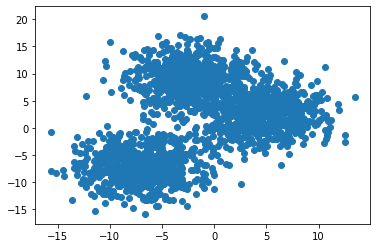

In [38]:
plt.scatter(np.array(features)[:,0],np.array(features)[:,1])
   

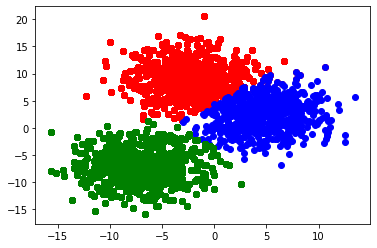

In [39]:
cdict = {0: 'red', 1: 'blue', 2: 'green'}
centroids, clusters, index = Kmeans(3,features,100)

for (i,value) in enumerate(clusters):
    plt.scatter(np.array(clusters[value])[:,0],np.array(clusters[value])[:,1],c = cdict[i])

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۵: تولید داده kmeans 
</h2>
<p style='direction:rtl; text-align: right'>با استفاده از تابع make_circles ۱۰۰۰ داده تولید کنید. ورودی تابع به صورت زیر میباشد:
    <ul style='direction:rtl; text-align: right'>
        <li>n_samples</li>
        <li>factor=0.5</li>
        <li>noise=0.05</li>
        </ul>
</p>

In [40]:
#####code here
noisy_circles = make_circles(n_samples = 1000, factor = 0.5, noise = 0.05);
##########
noisy_circles = noisy_circles[0]

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۶: نمایش داده 
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع scatter نمودار داده را رسم کنید.</li>
        </ul>
</p>

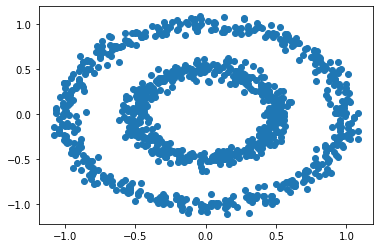

In [41]:
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۷: انجام الگوریتم kmeans روی داده های جدید 
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>تابع kmeans پیاده سازی شده را فراخوانی کنید.</li>
        <li>داده های لیبل شده را نمایش دهید.</li>
        </ul>
</p>

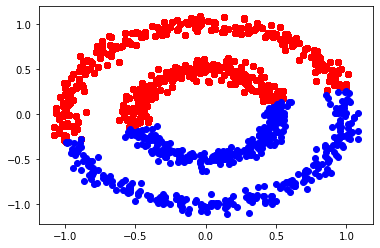

In [42]:
centroids, clusters, index = Kmeans(2,noisy_circles,100)
for (i,value) in enumerate(clusters):
#     ax.scatter(np.array(clusters[value])[:,0],np.array(clusters[value])[:,1],np.array(clusters[value])[:,2],c = cdict[i])
    plt.scatter(np.array(clusters[value])[:,0],np.array(clusters[value])[:,1],c = cdict[i])

<h2 style='direction:rtl; text-align: right'>
قسمت ۲: پیاده سازی دسته بندی طیفی  
</h2>

<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۱: پیاده سازی تابع ماتریس لاپلاسین  
</h2>
<p style='direction:rtl; text-align: right'> این تابع مجوعه نقاط را ورودی میگیرد و ماتریس لاپلاسین گراف همسایگی را خروجی میدهد.
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع kneighbors_graph ماتریس همسایگی داده را بدست آورید و در متغیر connectivity ذخیره کنید. ورودی n_neighbors این تابع را برابر ۸ و ورودی mode این تابع را برابر 'connectivity' قرار دهید.</li>
        <li>با استفاده از ماتریس همسایگی، ماتریس مجاورت را بدست بیاورید و در متغیر adjacency_matrix_s ذخیره کنید.</li>
        <li>با استفاده از تابع sparse.csgraph.laplacian ماتریس لاپلاسین را محاسبه کنید. ورودی csgraph این تابع را برابر adjacency_matrix_s و ورودی normed این تابع را برابر False قرار بدهید</li>
        </ul>
</p>


<p style='direction:rtl; text-align: right'>
    همانطور که مشاهده میکنید الگوریتم kmeans قادر به دسته بندی درست در این مجموعه داده نمیباشد.
</p>

In [44]:
def generate_graph_laplacian(df):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    #####code here

    connectivity = kneighbors_graph(X = df, n_neighbors = 8, mode = 'connectivity');
    adjacency_matrix_s = 0.5 * (connectivity + connectivity.T)

    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph = adjacency_matrix_s, normed = False);
    #########
    
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df = noisy_circles)


<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۲: بدست آوردن مقادیر و بردار های ویژه ماتریس لاپلاسین  
</h2>
<p style='direction:rtl; text-align: right'> پیاده سازی تابعی که ماتریس لاپلاسین را به عنوان روردی میگیرد و مقادیر و بردار های ویژه را خروجی میدهد.
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع linalg.eig مقادیر و بردار های ویژه را بدست آورید.</li>
        <li>با استفاده از تابع np.real مقدار حقیقی آن ها را پیدا کنید.</li>
        <li>مقادیر حقیقی ویژه و بردار های ویژه را خروجی دهید.</li>
        </ul>
</p>

In [45]:
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    #####code here
    eigenvals, eigenvcts = linalg.eig(graph_laplacian);
    eigenvals = np.real(eigenvals);
    eigenvcts = np.real(eigenvcts);
    #########
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۳: پیدا کردن تصویر با استفاده از بردار های ویژه و مقادیر ویژه  
</h2>
<p style='direction:rtl; text-align: right'> پیاده سازی تابعی که مقادیر و بردار های ویژه را به عنوان ورودی میگیرد و تصویر نقاط را به عنوان خروجی میدهد.
    <ul style='direction:rtl; text-align: right'>
        <li>اندیس مینیمم مقادیر ویژه را با استفاده از تابع np.argsort بدست آورید.</li>
        <li>با استفاده از تابع np.real مقدار حقیقی آن ها را پیدا کنید و حاصل را در indices ذخیره کنید.</li>
        <li>ستون indices از بردار های ویژه برابر تصویر خواسته شده است.</li>
        </ul>
</p>

In [46]:
def project_and_transpose(eigenvals, eigenvcts):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    #####code here
    eigenvals_sorted_indices = np.argsort(eigenvals);
    indices = np.real(eigenvals_sorted_indices[0]);

    proj_df = np.array(eigenvcts[:, indices.squeeze()]);
    ##########
    return proj_df

<h2 style='direction:rtl; text-align: right'>
قسمت ۲.۴: کلاسترینگ و نمایش داده های لیبل شده جدید  
</h2>
<p style='direction:rtl; text-align: right'> پیاده سازی تابعی که مقادیر و بردار های ویژه را به عنوان ورودی میگیرد و
    <ul style='direction:rtl; text-align: right'>
        <li>با استفاده از تابع نوشته شده در قسمت قبل تصاویر نقاط را پیدا کنید.</li>
        <li>حال الگوریتم kmeans را روی تصاویر اجرا کنید.</li>
        <li>داده های لیبل شده را نمایش دهید.</li>
        </ul>
</p>

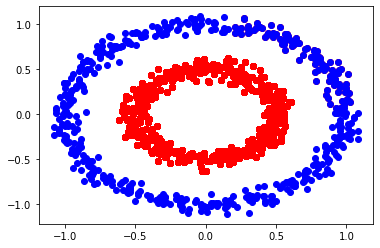

In [47]:
x = project_and_transpose(eigenvals, eigenvcts)
centroids, clusters, index = Kmeans(2, x, 100)
# print(index[''])
for (i,value) in enumerate(index):
    plt.scatter(noisy_circles[index[value],0],noisy_circles[index[value],1],c = cdict[i])

<p style='direction:rtl; text-align: right'> همانطور که مشاهده میکنید در این روش توانستیم داده ها را به درستی دسته بندی بکنیم.</p>